In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from bs4 import BeautifulSoup
from env import api_key
import time
import json
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.reset_option("display.max_rows", "display.max_columns")
import prepare 
import acquire
import re
from time import sleep
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split

In [2]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

    
def plot_pairplot(train, cols, hue=None):
    '''
    Take in train df, list of columns to plot, and hue=None
    and display scatter plots and hists.
    '''
    sns.pairplot(train[cols], corner=True)
    plt.show()
    
    
    
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    train.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()
    
def explore_univariate(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks, and turns off gridlines.
    plt.figure(figsize=(30,10))
    sns.set(font_scale = 2)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=variable, data=df)
    plt.xlabel('')
    plt.title('Box Plot', fontsize=30)
    
    # distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=variable, element='step', kde=True, color='blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Distribution', fontsize=30)
    
    #title
    plt.suptitle(f'{variable}', fontsize = 45)
    plt.tight_layout()
    plt.show()
    
    
def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue=target)
    plt.show()    

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 6), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        
def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat) 

def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()


# Exploration

- Target = Winning_Team

Questions to research
Univariate Study
- Ward score effects the outcome
- assists effects the outcome 
- damage by magic effects the outcome
- buildings effect the outcome
- xp gained effects the outcome
- number of inhibitors lost effects the outcome
- inhibitor lost team 100, team_jungleMinionsKilled_100, team_killsplayer_100, team_level_100, team_minionsKilled_100.
- repeat above but for 200 team
- dragaon team effects the outcome of the game

Bivariate Study

- winning team and blue team level > 50, also < 50
- same for red team
- team_magicDamageDoneToChampions_100 > the average, also < average
- run same for 200
- winning team and team_physicalDamageDoneToChampions_100 > average, also < average
- run same for 200

Multivariate Study

-  blue team takes dragons and blue team assists effects the outcome of the game
- blue wards and blue towers taken effects the outcome of the game
- blue damage is more important then red damage will efect the outcome
- Red towers lost and total red team damage will effect the outcome of a red team win


In [12]:
df = pd.read_csv('final_10.csv')

df

,Unnamed: 0,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,chemtechdragon_team100,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,hextechdragon_team100,hextechdragon_team200,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_0,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,matchId,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,queueId,riftherald_team100,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,time_cutoff,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,waterdragon_team100,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,chemtechdragon_team200,riftherald_team200,airdragon_team200,waterdragon_team200
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0,876.0,1331.0,556.0,629.0,437.0,400.0,625.0,102.0,1331.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1752,1637449991725,4110664149,CLASSIC,teambuilder-match-4110664149,1637448239216,MATCHED_GAME,11.23.409.111,0.0,30.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [13]:
#Now prepare it
train, test = prepare.prepare(df)
train.shape, test.shape

((3890, 266), (973, 266))

In [14]:
df = df.drop(columns=['gameMode', 'gameType','gameVersion','matchId','gameName'])

In [15]:
train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 3513 to 3582
Data columns (total 266 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    Unnamed: 0                                int64  
 1    BlueTeamAirDragon                         float64
 2    BlueTopAssists                            float64
 3    RedSupportAssists                         float64
 4    BlueJungleAssists                         float64
 5    BlueMidAssists                            float64
 6    BlueADCAssists                            float64
 7    BlueSupportAssists                        float64
 8    RedTopAssists                             float64
 9    RedJungleAssists                          float64
 10   RedMidAssists                             float64
 11   RedADCAssists                             float64
 12   BlueTeamBarons                            float64
 13   BlueTeamChemtechDragon                    f

In [16]:
train.describe()

,Unnamed: 0,BlueTeamAirDragon,BlueTopAssists,RedSupportAssists,BlueJungleAssists,BlueMidAssists,BlueADCAssists,BlueSupportAssists,RedTopAssists,RedJungleAssists,RedMidAssists,RedADCAssists,BlueTeamBarons,BlueTeamChemtechDragon,BlueTopCurrentGold,RedSupportCurrentGold,BlueJungleCurrentGold,BlueMidCurrentGold,BlueADCCurrentGold,BlueSupportCurrentGold,RedTopCurrentGold,RedJungleCurrentGold,RedMidCurrentGold,RedADCCurrentGold,BlueTopDeaths,RedSupportDeaths,BlueJungleDeaths,BlueMidDeaths,BlueADCDeaths,BlueSupportDeaths,RedTopDeaths,RedJungleDeaths,RedMidDeaths,RedADCDeaths,BlueTeamDragons,RedTeamDragons,BlueTeamEarthDragon,RedTeamEarthDragon,BlueTeamFireDragon,RedTeamFireDragon,gameDuration,gameEndTimestamp,gameId,gameStartTimestamp,BlueTopgoldPerSecond,RedSupportgoldPerSecond,BlueJunglegoldPerSecond,BlueMidgoldPerSecond,BlueADCgoldPerSecond,BlueSupportgoldPerSecond,RedTopgoldPerSecond,RedJunglegoldPerSecond,RedMidgoldPerSecond,RedADCgoldPerSecond,BlueTeamHextechDragonDragon,RedTeamHextechDragonDragon,RedTeamInhibsLost,BlueTopJungleMinionsKilled,RedSupportJungleMinionsKilled,BlueJungleJungleMinionsKilled,BlueMidJungleMinionsKilled,BlueADCJungleMinionsKilled,BlueSupportJungleMinionsKilled,RedTopJungleMinionsKilled,RedJungleJungleMinionsKilled,RedMidJungleMinionsKilled,RedADCJungleMinionsKilled,BlueTopKills,RedSupportKills,BlueJungleKills,BlueMidKills,BlueADCKills,BlueSupportKills,RedTopKills,RedJungleKills,RedMidKills,RedADCKills,BlueTopLevel,RedSupportLevel,BlueJungleLevel,BlueMidLevel,BlueADCLevel,BlueSupportLevel,RedTopLevel,RedJungleLevel,RedMidLevel,RedADCLevel,BlueTopMagicDamageDoneToChampions,RedSupportMagicDamageDoneToChampions,BlueJungleMagicDamageDoneToChampions,BlueMidMagicDamageDoneToChampions,BlueADCMagicDamageDoneToChampions,BlueSupportMagicDamageDoneToChampions,RedTopMagicDamageDoneToChampions,RedJungleMagicDamageDoneToChampions,RedMidMagicDamageDoneToChampions,RedADCMagicDamageDoneToChampions,BlueTopMinionsKilled,RedSupportMinionsKilled,BlueJungleMinionsKilled,BlueMidMinionsKilled,BlueADCMinionsKilled,BlueSupportMinionsKilled,RedTopMinionsKilled,RedJungleMinionsKilled,RedMidMinionsKilled,RedADCMinionsKilled,BlueTopPhysicalDamageDoneToChampions,RedSupportPhysicalDamageDoneToChampions,BlueJunglePhysicalDamageDoneToChampions,BlueMidPhysicalDamageDoneToChampions,BlueADCPhysicalDamageDoneToChampions,BlueSupportPhysicalDamageDoneToChampions,RedTopPhysicalDamageDoneToChampions,RedJunglePhysicalDamageDoneToChampions,RedMidPhysicalDamageDoneToChampions,RedADCPhysicalDamageDoneToChampions,queueId,BlueTeamRiftHeralds,riftherald_team300,BlueTopTimeEnemySpentControlled,RedSupportTimeEnemySpentControlled,BlueJungleTimeEnemySpentControlled,BlueMidTimeEnemySpentControlled,BlueADCTimeEnemySpentControlled,BlueSupportTimeEnemySpentControlled,RedTopTimeEnemySpentControlled,RedJungleTimeEnemySpentControlled,RedMidTimeEnemySpentControlled,RedADCTimeEnemySpentControlled,time_cutoff,timestamp,BlueTopTotalDamageDoneToChampions,RedSupportTotalDamageDoneToChampions,BlueJungleTotalDamageDoneToChampions,BlueMidTotalDamageDoneToChampions,BlueADCTotalDamageDoneToChampions,BlueSupportTotalDamageDoneToChampions,RedTopTotalDamageDoneToChampions,RedJungleTotalDamageDoneToChampions,RedMidTotalDamageDoneToChampions,RedADCTotalDamageDoneToChampions,BlueTopTotalGold,RedSupportTotalGold,BlueJungleTotalGold,BlueMidTotalGold,BlueADCTotalGold,BlueSupportTotalGold,RedTopTotalGold,RedJungleTotalGold,RedMidTotalGold,RedADCTotalGold,BlueTeamTowersLost,RedTeamTowersLost,BlueTopTrueDamageDoneToChampions,RedSupportTrueDamageDoneToChampions,BlueJungleTrueDamageDoneToChampions,BlueMidTrueDamageDoneToChampions,BlueADCTrueDamageDoneToChampions,BlueSupportTrueDamageDoneToChampions,RedTopTrueDamageDoneToChampions,RedJungleTrueDamageDoneToChampions,RedMidTrueDamageDoneToChampions,RedADCTrueDamageDoneToChampions,ward_player_0,BlueTopWard,RedSupportWard,BlueJungleWard,BlueMidWard,BlueADCWard,BlueSupportWard,RedTopWard,RedJungleWard,RedMidWard,RedADCWard,BlueTeamWaterDragon,w

# Univariate 

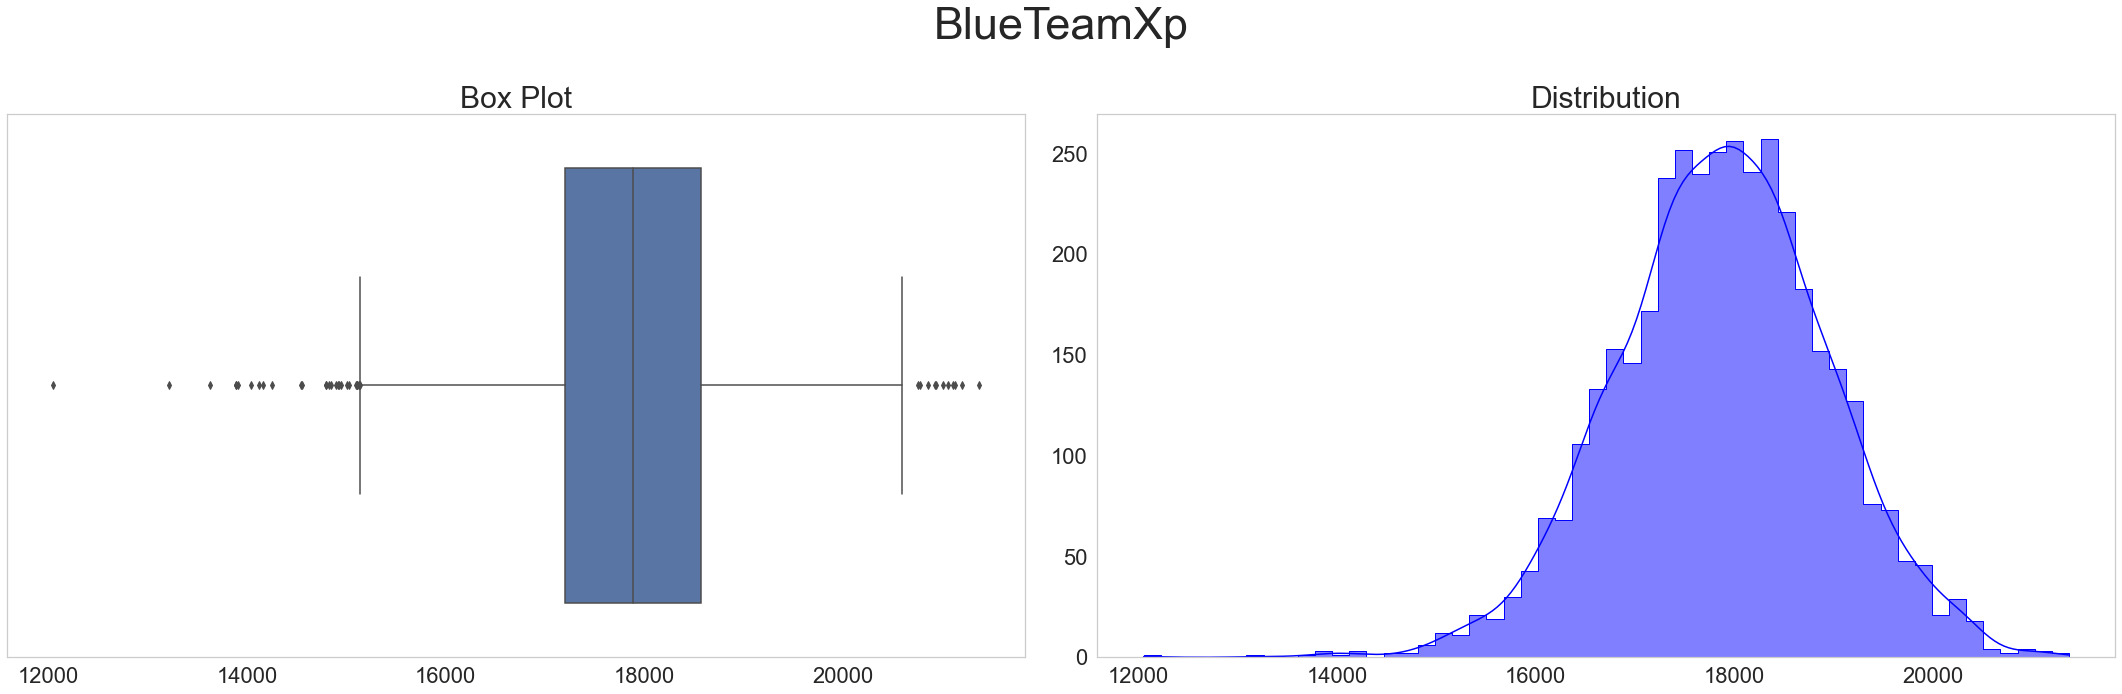

Summary Statistics for BlueTeamXp
count     3890.000000
mean     17873.612853
std       1063.979191
min      12054.000000
25%      17200.250000
50%      17891.000000
75%      18575.000000
max      21368.000000
Name: BlueTeamXp, dtype: float64


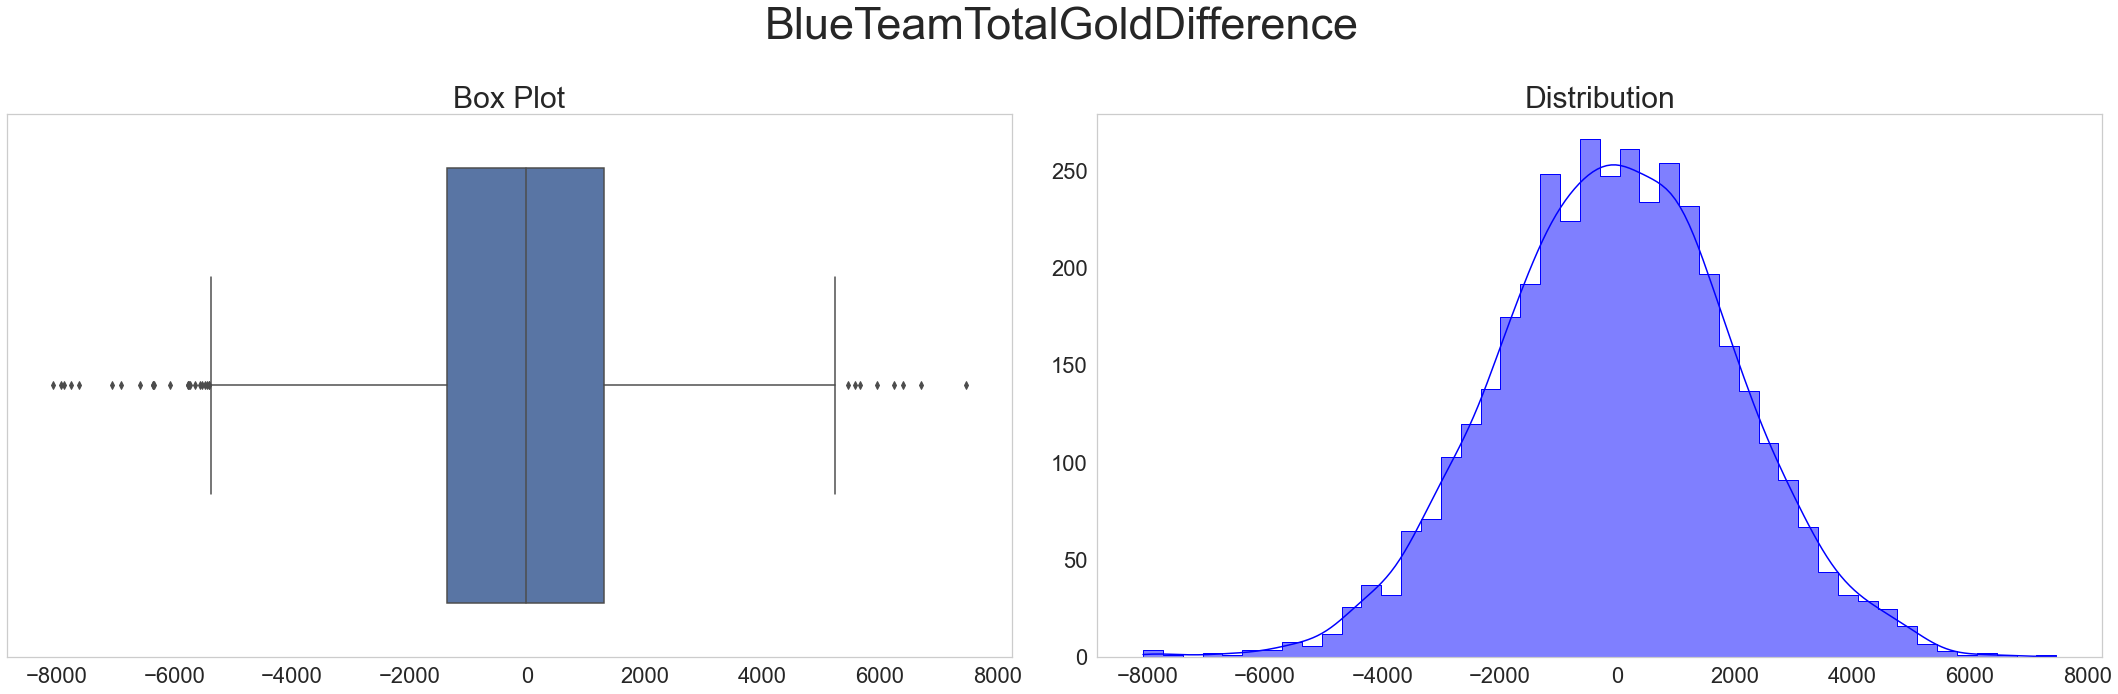

Summary Statistics for BlueTeamTotalGoldDifference
count    3890.000000
mean      -40.068380
std      2020.740207
min     -8073.000000
25%     -1369.500000
50%       -19.000000
75%      1306.500000
max      7473.000000
Name: BlueTeamTotalGoldDifference, dtype: float64


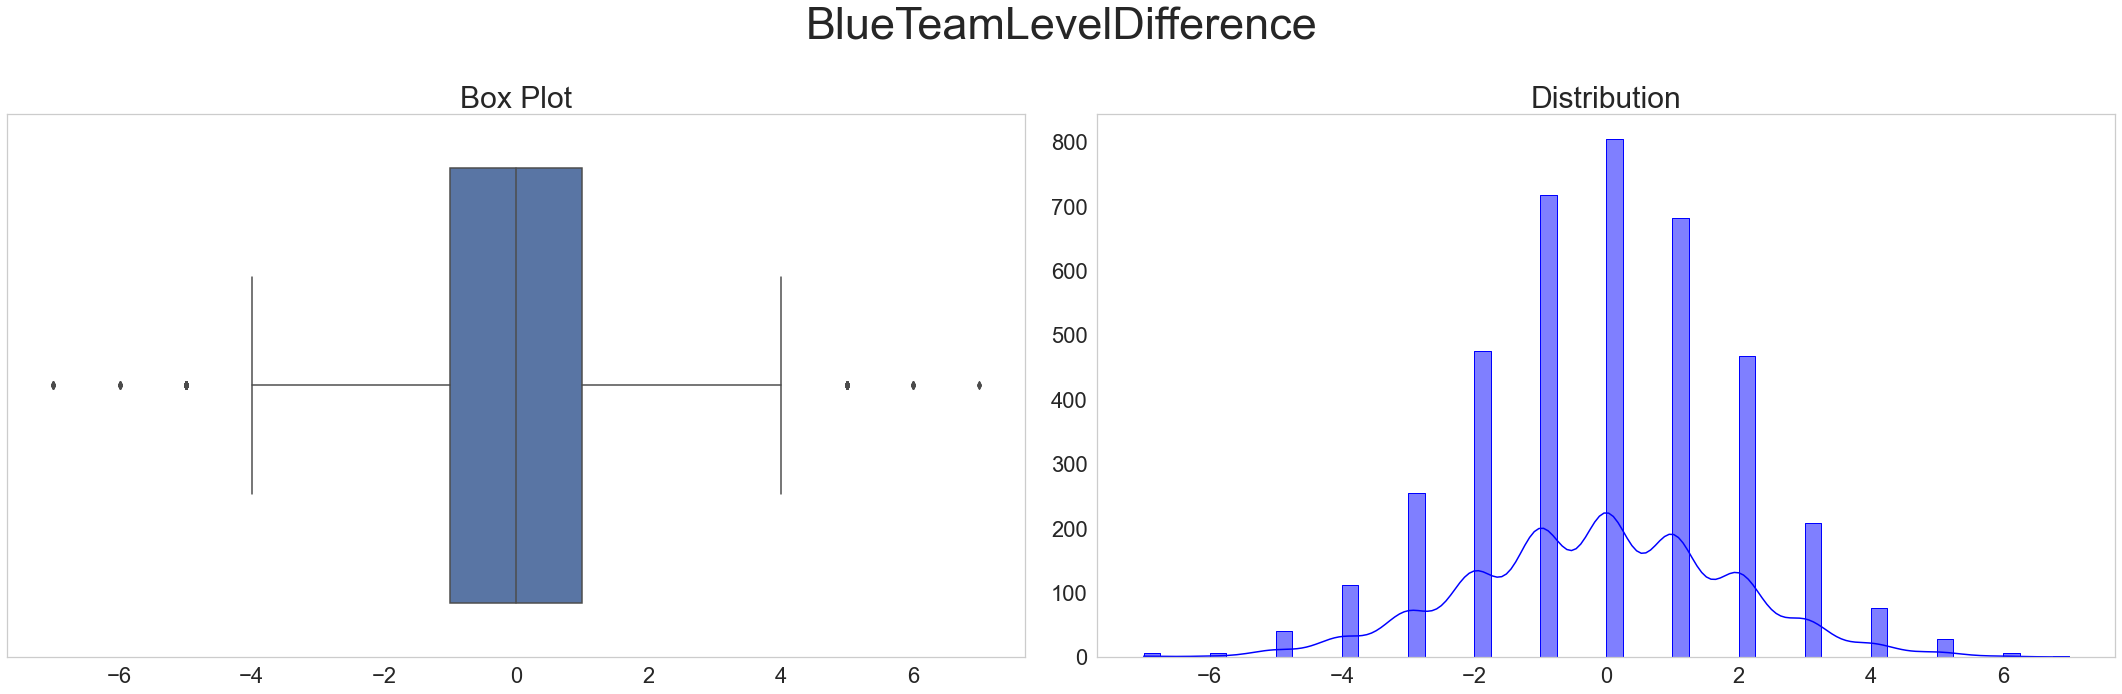

Summary Statistics for BlueTeamLevelDifference
count    3890.000000
mean       -0.109254
std         1.957544
min        -7.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: BlueTeamLevelDifference, dtype: float64


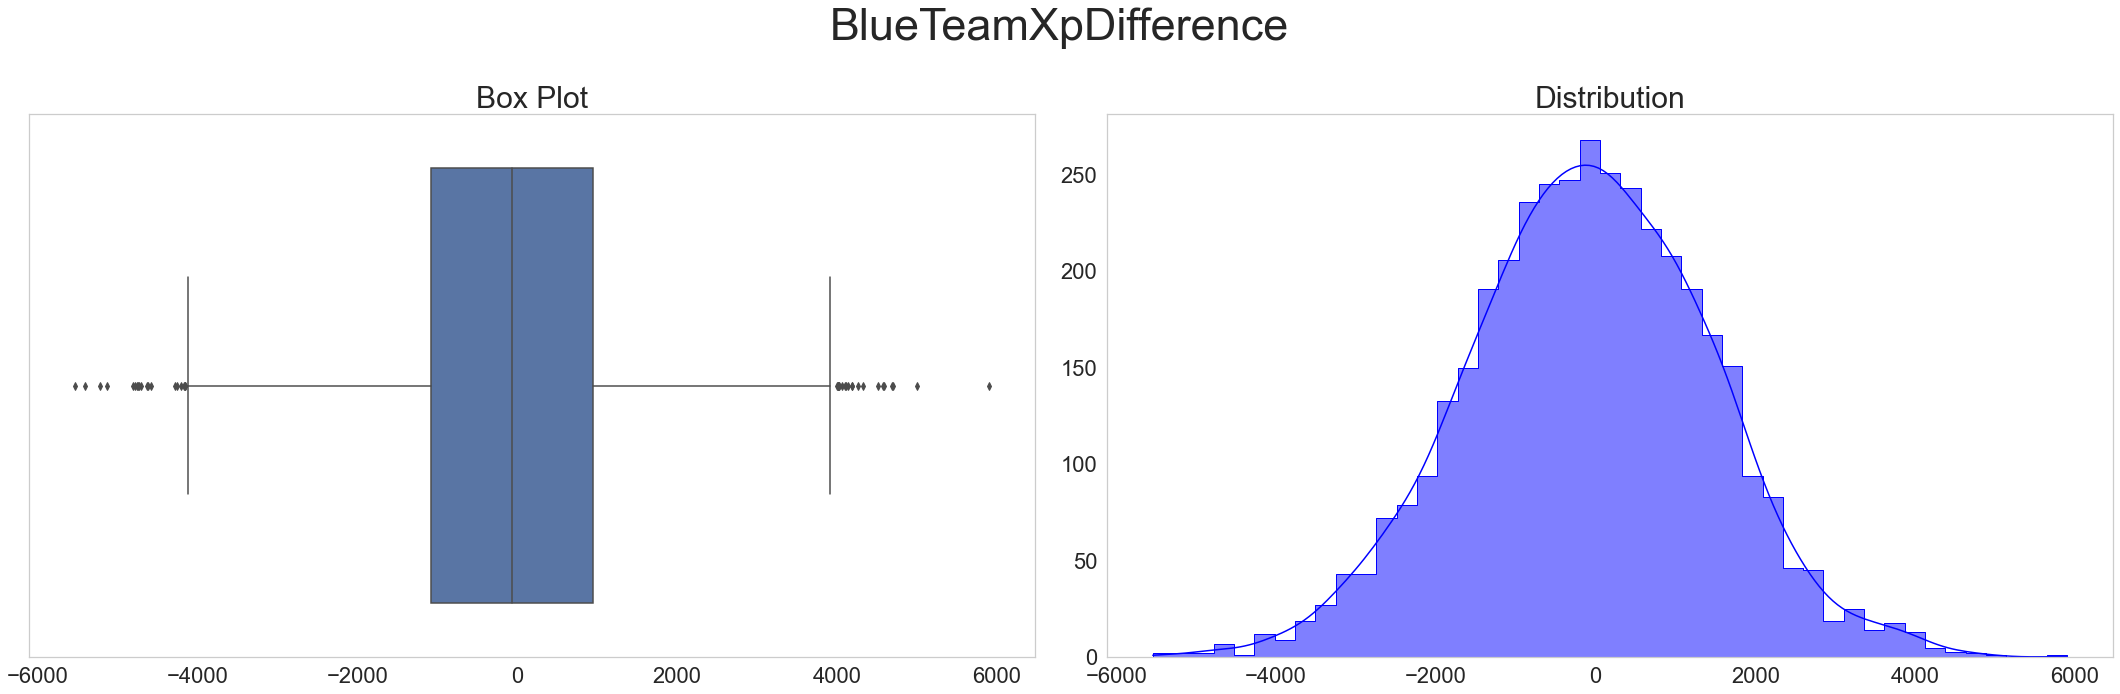

Summary Statistics for BlueTeamXpDifference
count    3890.000000
mean      -93.062982
std      1531.677889
min     -5544.000000
25%     -1080.750000
50%       -75.000000
75%       948.500000
max      5903.000000
Name: BlueTeamXpDifference, dtype: float64


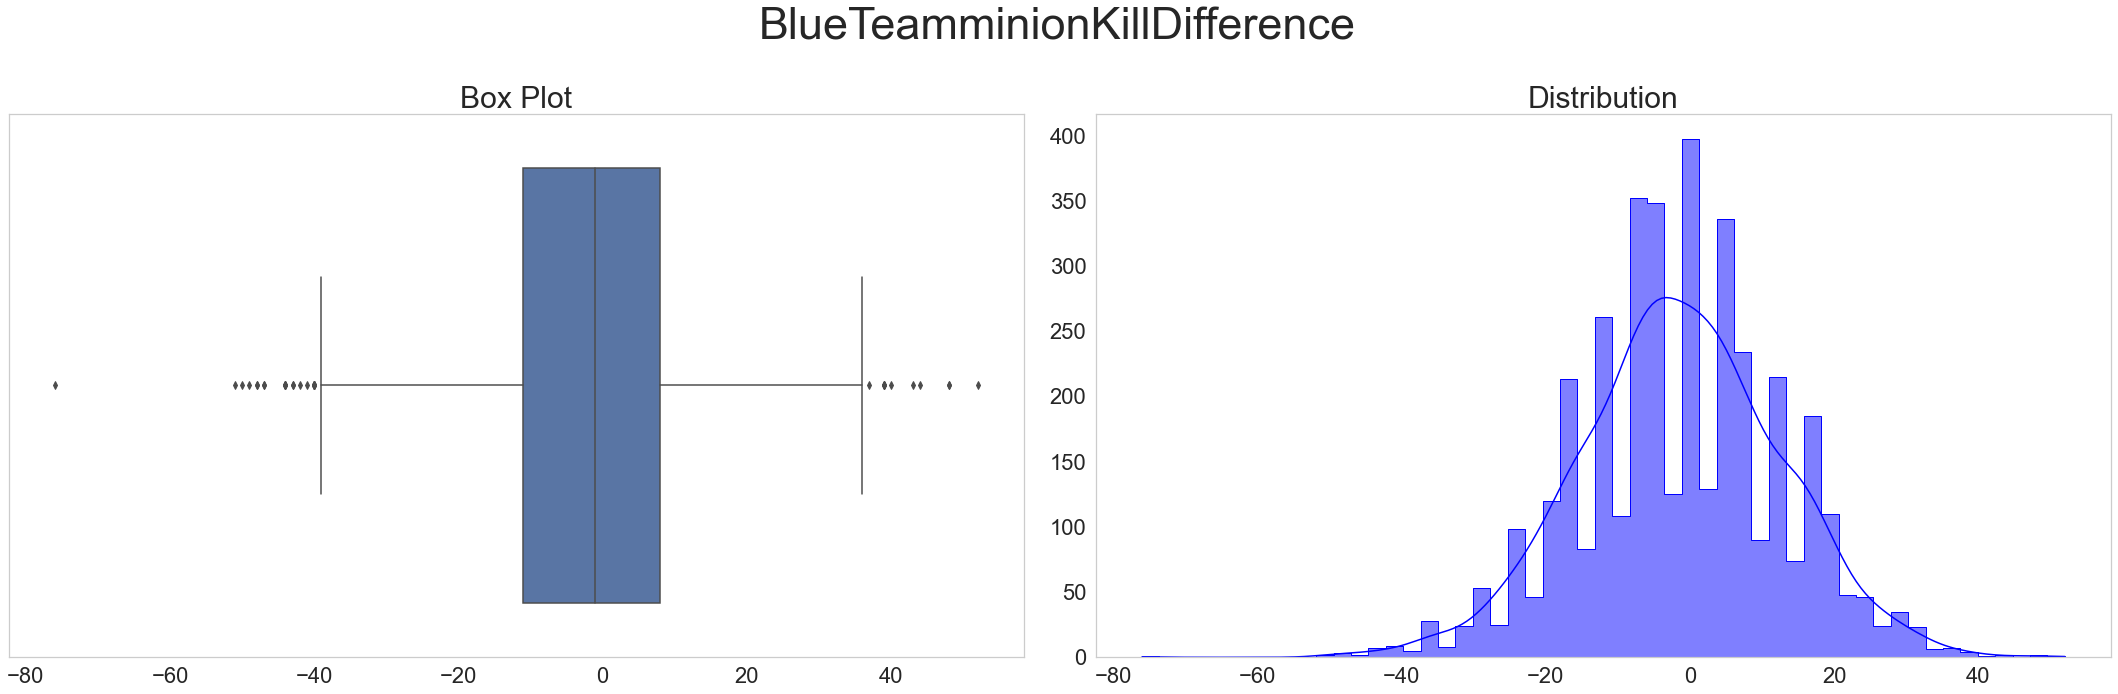

Summary Statistics for BlueTeamminionKillDifference
count    3890.000000
mean       -1.453470
std        14.120155
min       -76.000000
25%       -11.000000
50%        -1.000000
75%         8.000000
max        52.000000
Name: BlueTeamminionKillDifference, dtype: float64


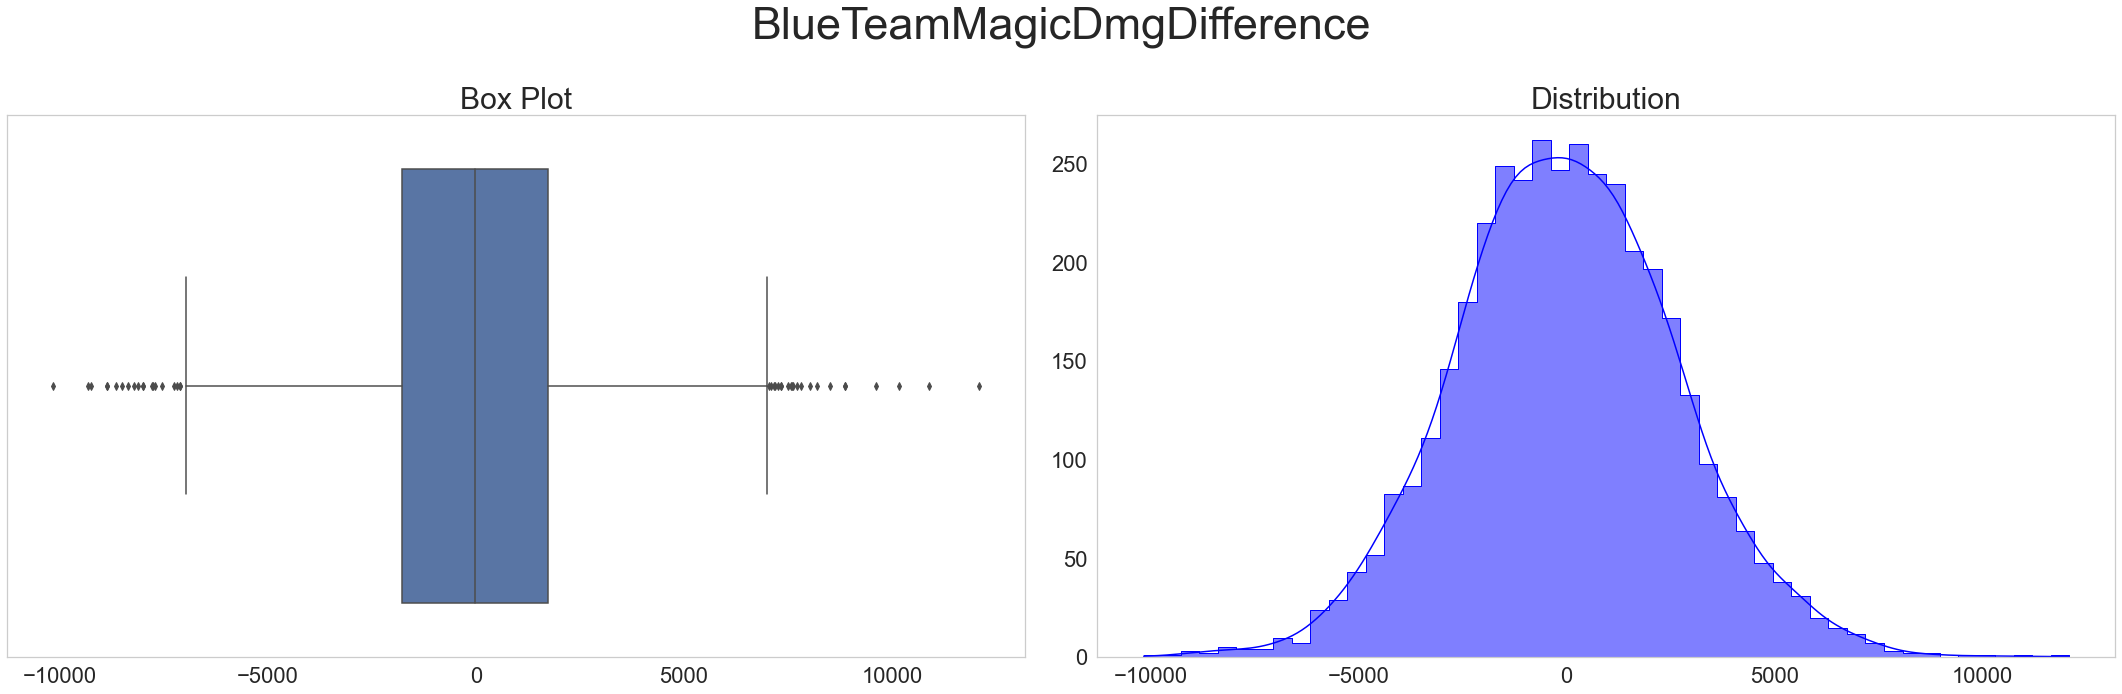

Summary Statistics for BlueTeamMagicDmgDifference
count     3890.000000
mean       -11.937275
std       2671.372744
min     -10162.000000
25%      -1778.000000
50%        -37.500000
75%       1737.000000
max      12091.000000
Name: BlueTeamMagicDmgDifference, dtype: float64


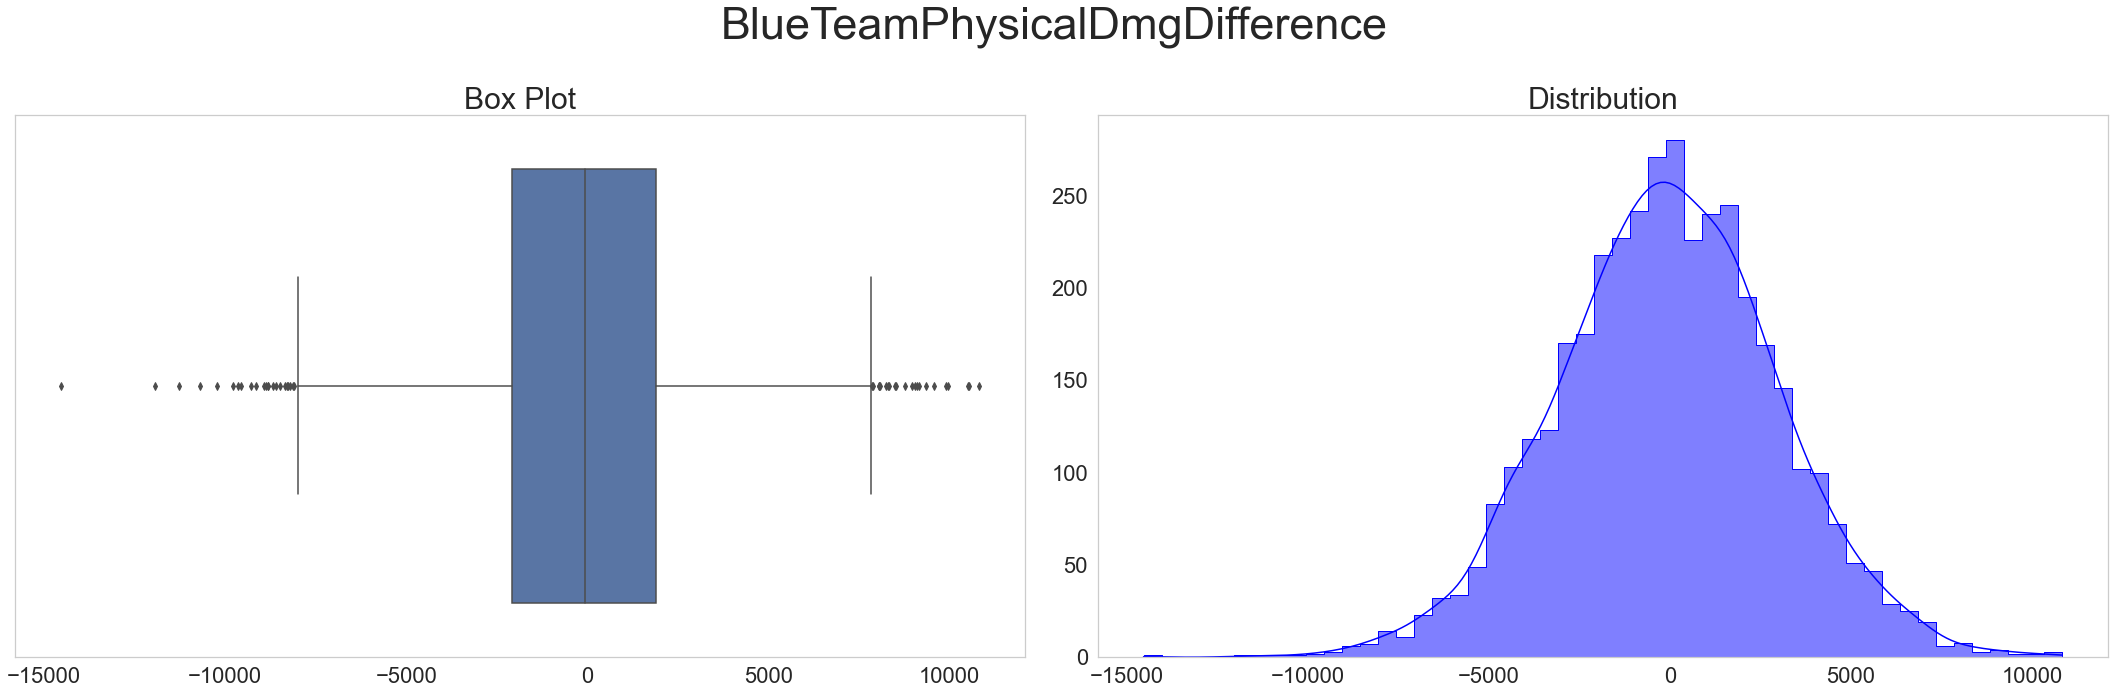

Summary Statistics for BlueTeamPhysicalDmgDifference
count     3890.000000
mean       -85.191774
std       3052.809133
min     -14542.000000
25%      -2068.500000
50%        -51.000000
75%       1903.750000
max      10834.000000
Name: BlueTeamPhysicalDmgDifference, dtype: float64


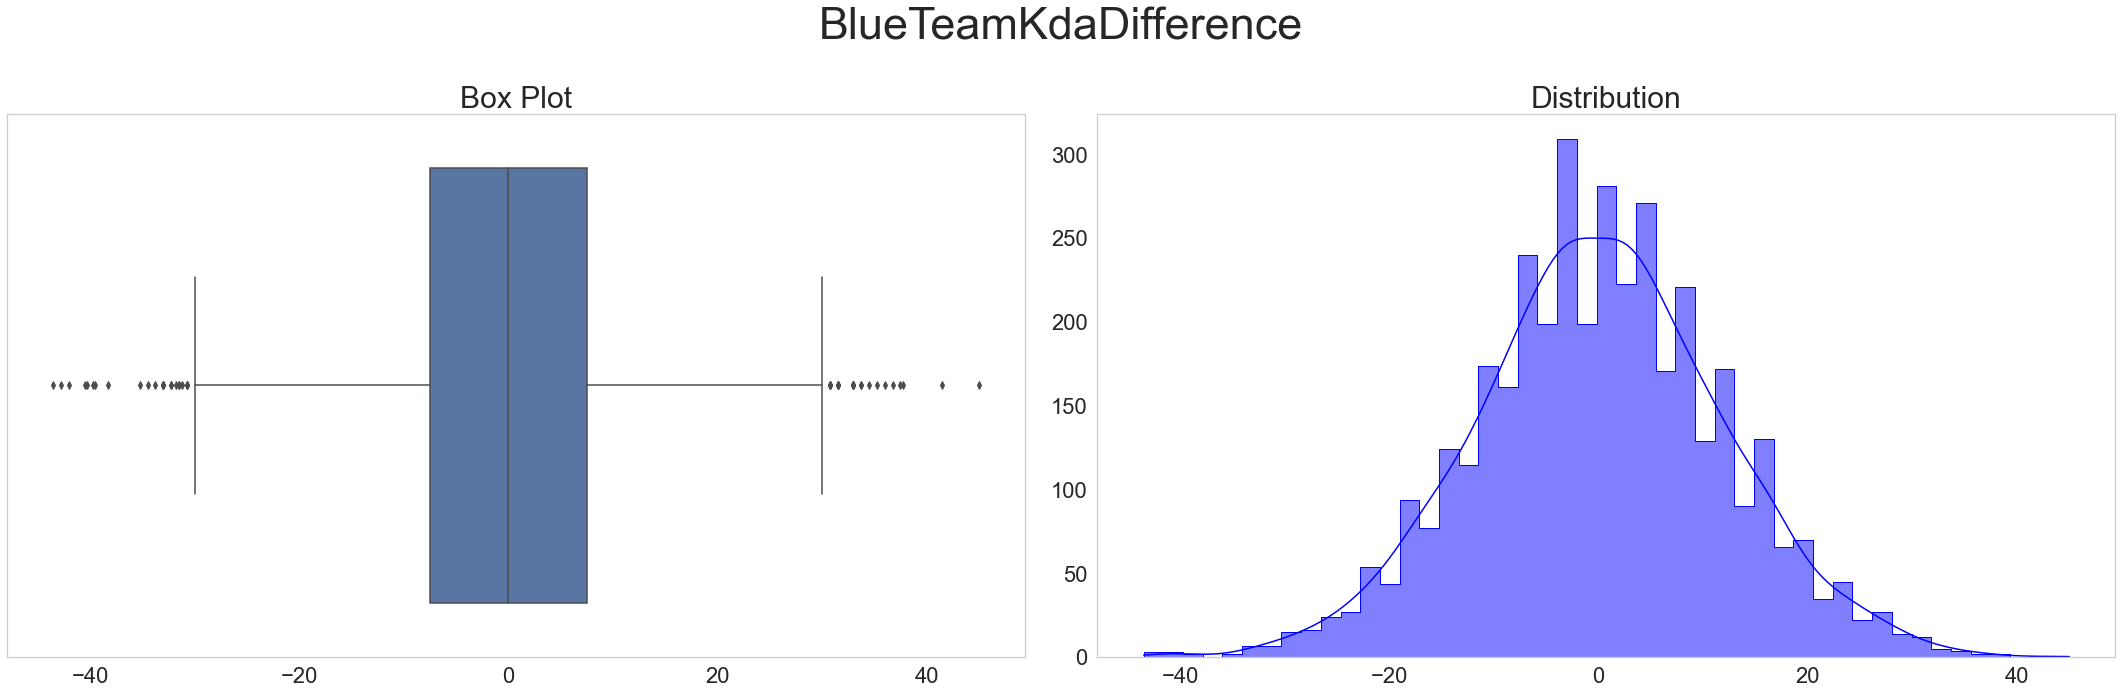

Summary Statistics for BlueTeamKdaDifference
count    3890.000000
mean        0.099679
std        11.900647
min       -43.500000
25%        -7.500000
50%         0.000000
75%         7.500000
max        45.000000
Name: BlueTeamKdaDifference, dtype: float64


In [17]:
# univariate study
univariate_study = ['BlueTeamXp','BlueTeamTotalGoldDifference', 'BlueTeamLevelDifference','BlueTeamXpDifference','BlueTeamminionKillDifference','BlueTeamMagicDmgDifference', 'BlueTeamPhysicalDmgDifference','BlueTeamKdaDifference']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

<Figure size 864x576 with 0 Axes>

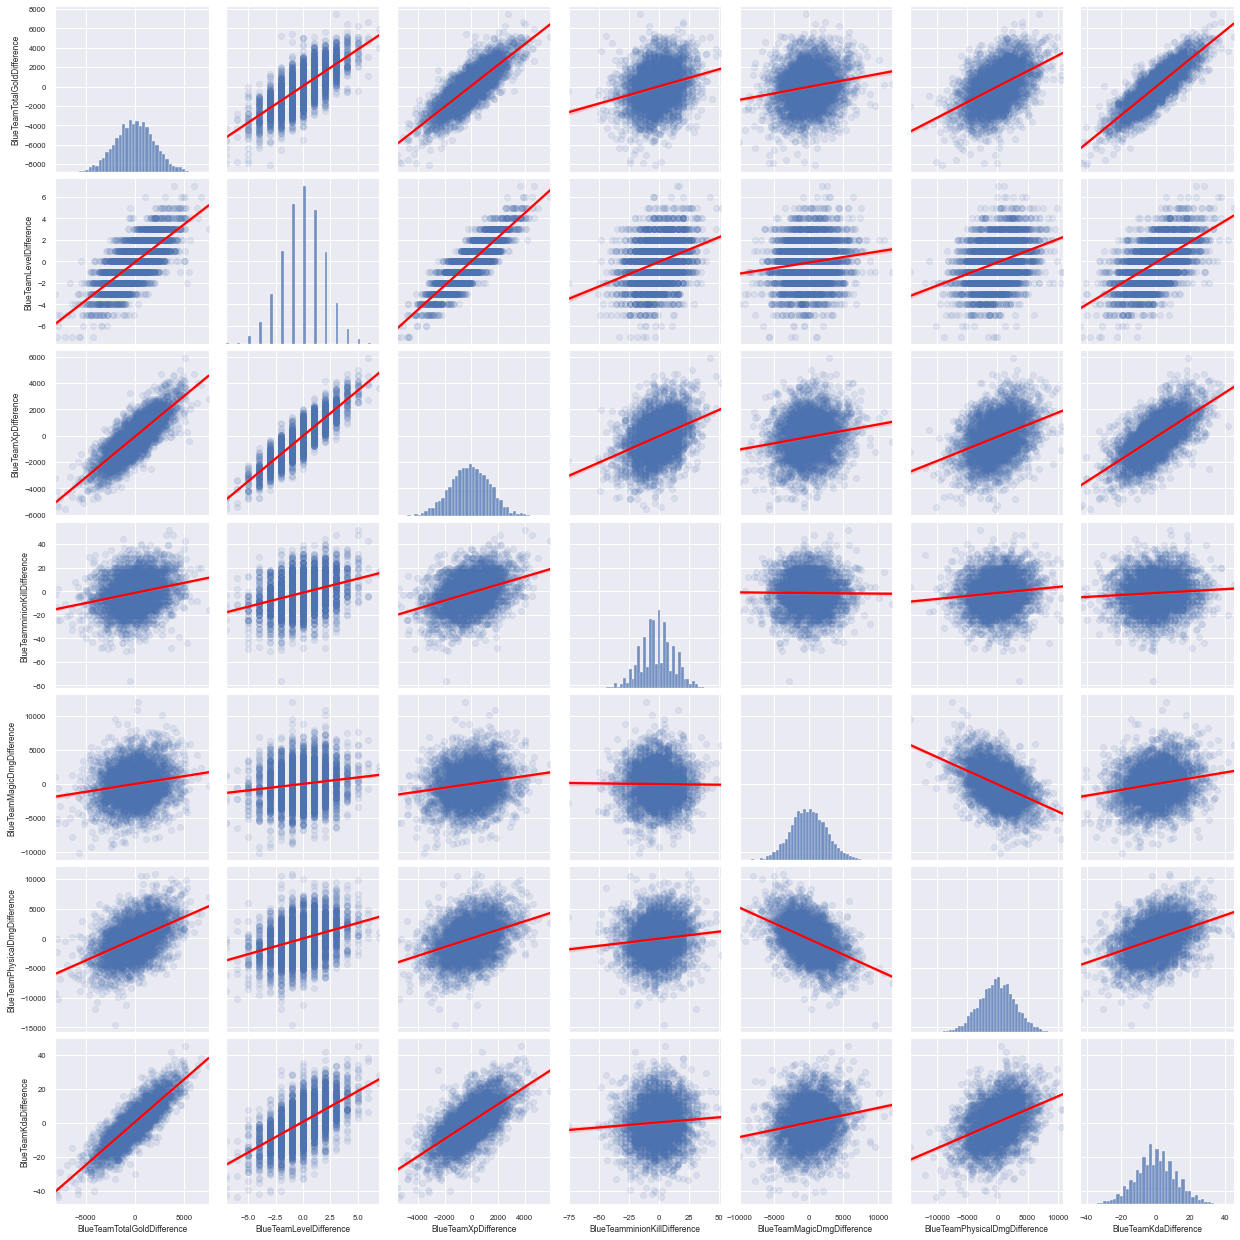

In [18]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()
cols = ['BlueTeamTotalGoldDifference', 'BlueTeamLevelDifference','BlueTeamXpDifference','BlueTeamminionKillDifference','BlueTeamMagicDmgDifference', 'BlueTeamPhysicalDmgDifference','BlueTeamKdaDifference']
#pairplots 
sns.set(font_scale=.7)
plt.figure(figsize=(12,8))
plot_variable_pairs(train,cols)

## Variabe Pairs Takeaway

- Blue team had 40 less gold then red at the 10 min mark. Distribution was normal
- Blue and red team levels were almost the same and even distributed
- Blue team had 93 less xp then red team and the distribution was normal
- Blue team had same number of minion kills as red team
- Blue team magic damage had little less then red team
- Blue team physical dmg was 85 off then red
- Blue team had a slightly better kda then red


Text(0.5, 1.0, 'Feautures Correlating with winningTeam')

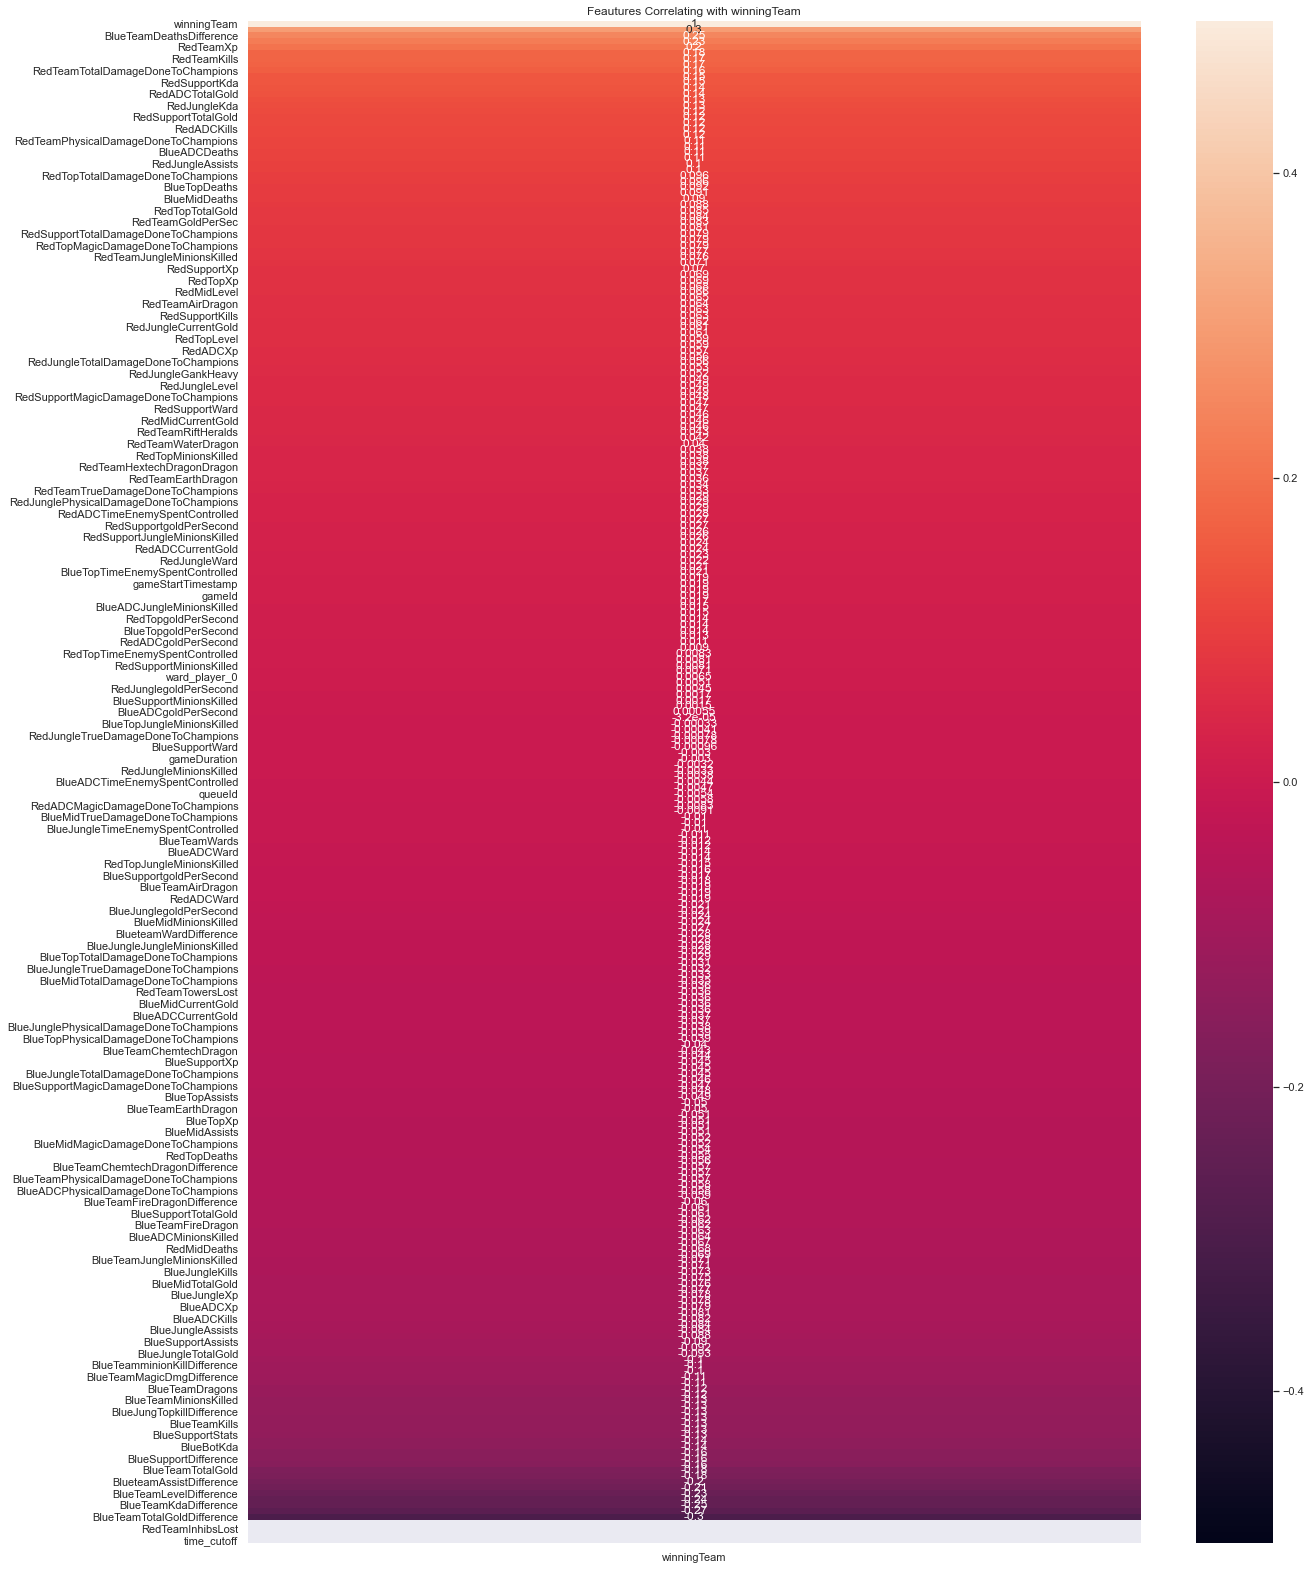

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(20,28))
heatmap = sns.heatmap(train.corr()[['winningTeam']].sort_values(by='winningTeam', ascending=False), vmin=-.50, vmax=.50, annot=True)
heatmap.set_title('Feautures Correlating with winningTeam')

## What key drivers effect the outcome of winning a match?

- Is there a correlation between Blue team's gold and team levels that could effect outcome of the game
- Is there a correlation between Blue Team Physical Damage Difference and Blue Team Kda Difference
- Is there a correlation between Blue team ward difference and blue team's minion kill difference that will effect the outcome of the game

### Question 1
- Is there a correlation between Blue team's gold and team levels that could effect outcome of the game

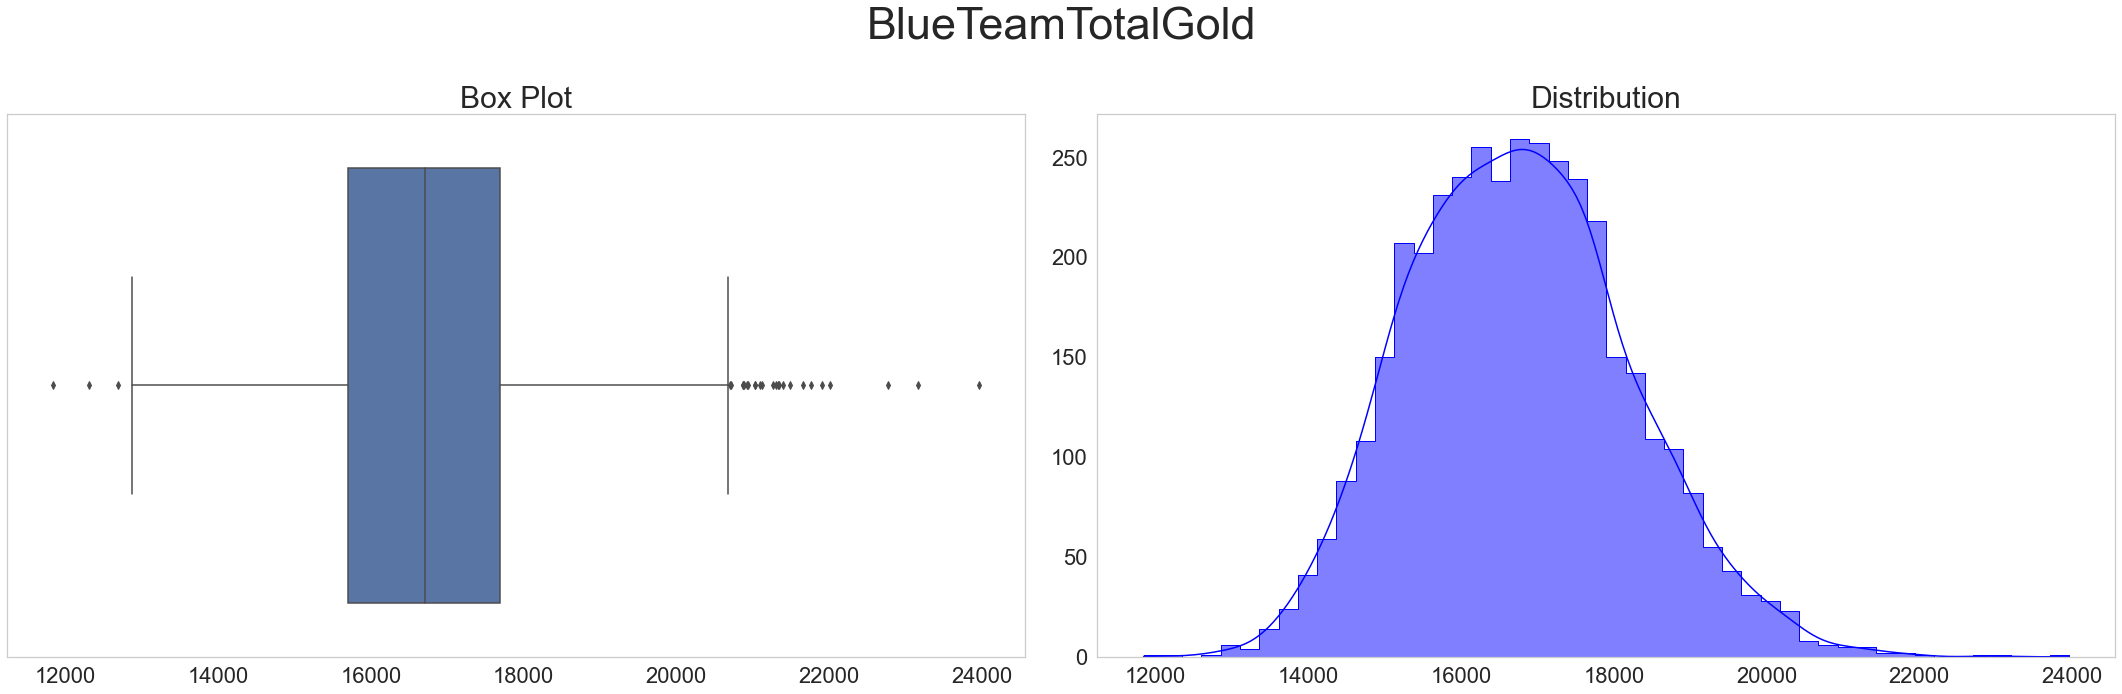

Summary Statistics for BlueTeamTotalGold
count     3890.000000
mean     16757.383548
std       1458.330670
min      11846.000000
25%      15704.250000
50%      16704.000000
75%      17694.000000
max      23960.000000
Name: BlueTeamTotalGold, dtype: float64


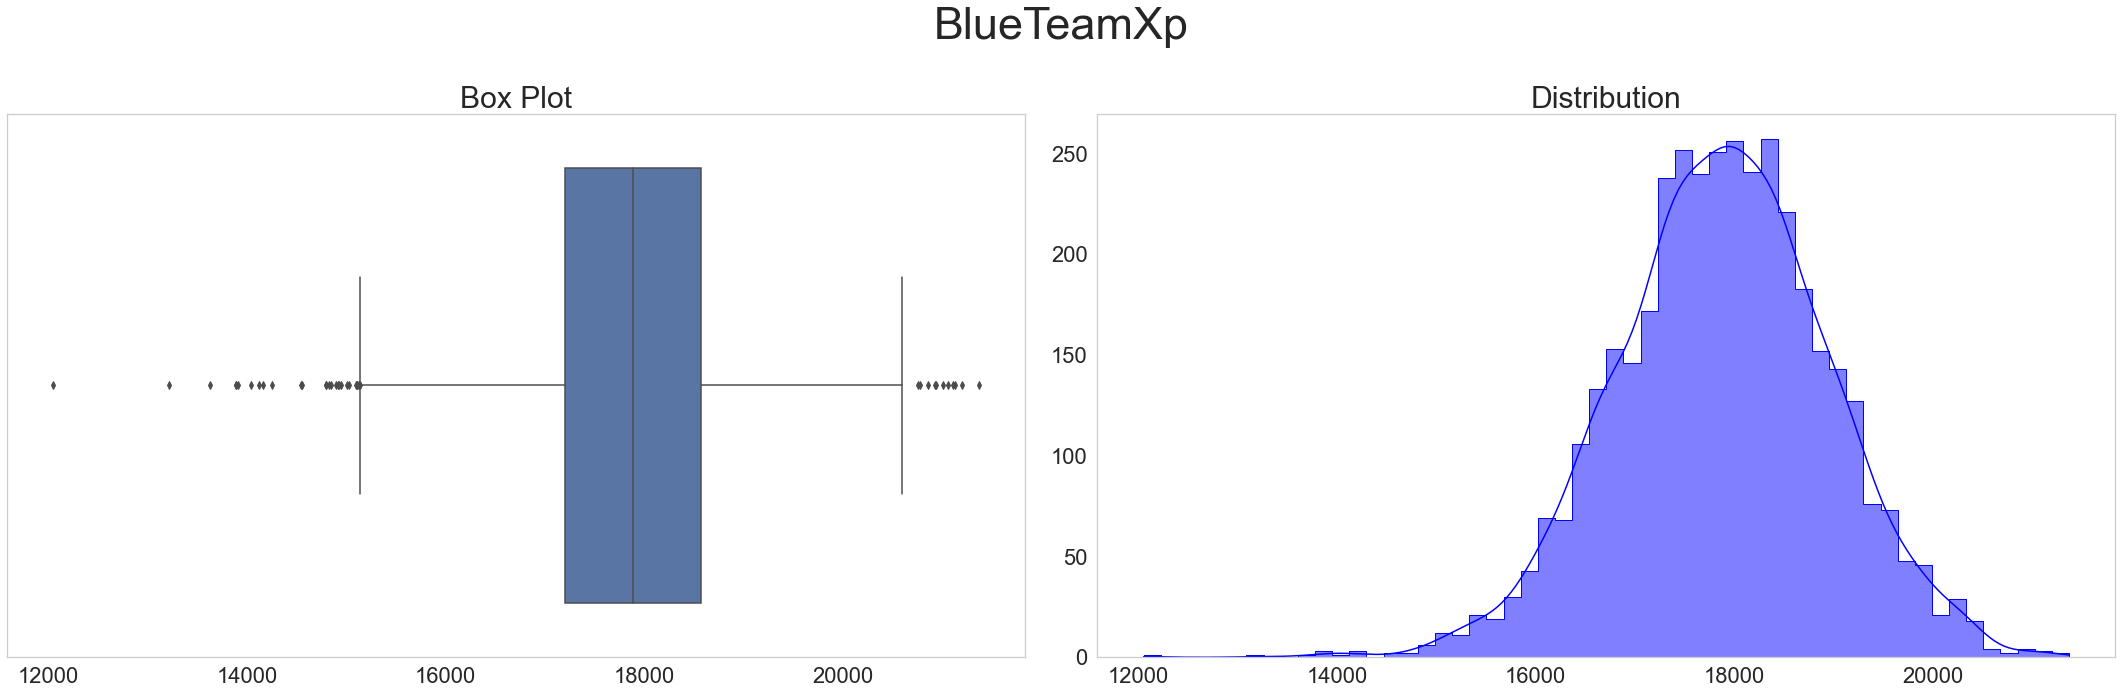

Summary Statistics for BlueTeamXp
count     3890.000000
mean     17873.612853
std       1063.979191
min      12054.000000
25%      17200.250000
50%      17891.000000
75%      18575.000000
max      21368.000000
Name: BlueTeamXp, dtype: float64


In [20]:
# univariate study
univariate_study = ['BlueTeamTotalGold','BlueTeamXp']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

- Blue team had less then average gold and almost average levels at the 10 min mark
-

### Man Whitney U

In [21]:
# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(train.BlueTeamTotalGoldDifference, train.BlueTeamXp)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")


1185.5696582781368 6.056434722308769e-242
blue and red populations do not have equal variances


<Figure size 720x360 with 0 Axes>

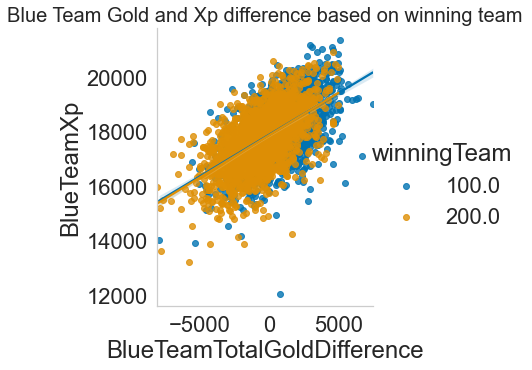

In [23]:
plt.figure(figsize=(10,5))
sns.lmplot(x='BlueTeamTotalGoldDifference',y='BlueTeamXp',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Team Gold and Xp difference based on winning team', fontsize = 20)
plt.show()

## Hypothesis

### $H_0$: Blue team's gold difference over 40 and blue team's Xp over 17k  is not significant

### $H_a$: Blue team's gold difference over 40 and blue team's Xp over 17k  is  significant

In [24]:
import scipy.stats as stats
# hypothesis testing

null_hypothesis = "Blue team's gold difference over 40 and blue team's Xp over 17k  is not significant"
alternative_hypothesis = "Blue team's gold difference over 40 and blue team's Xp over 17k  is  significant"
a = 0.05 #a for alpha 

big_loss = train[train.BlueTeamTotalGoldDifference > 40]
little_loss = train[train.BlueTeamXp >= 17_000]
t, p = stats.ttest_ind(big_loss.winningTeam, little_loss.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

2.4805861976448994e-11
Reject null hypothesis that: Blue team's gold difference over 40 and blue team's Xp over 17k  is not significant
There is evidence to suggest: Blue team's gold difference over 40 and blue team's Xp over 17k  is  significant


### Hypothesis Results:
- There is evidence to suggest Blue team's gold difference over 40 and blue team's Xp over 17k is significant with a negative p value

### Question 2
- Is there a correlation between 'Blue Team Physical Damage Difference and Blue Team Kda Difference

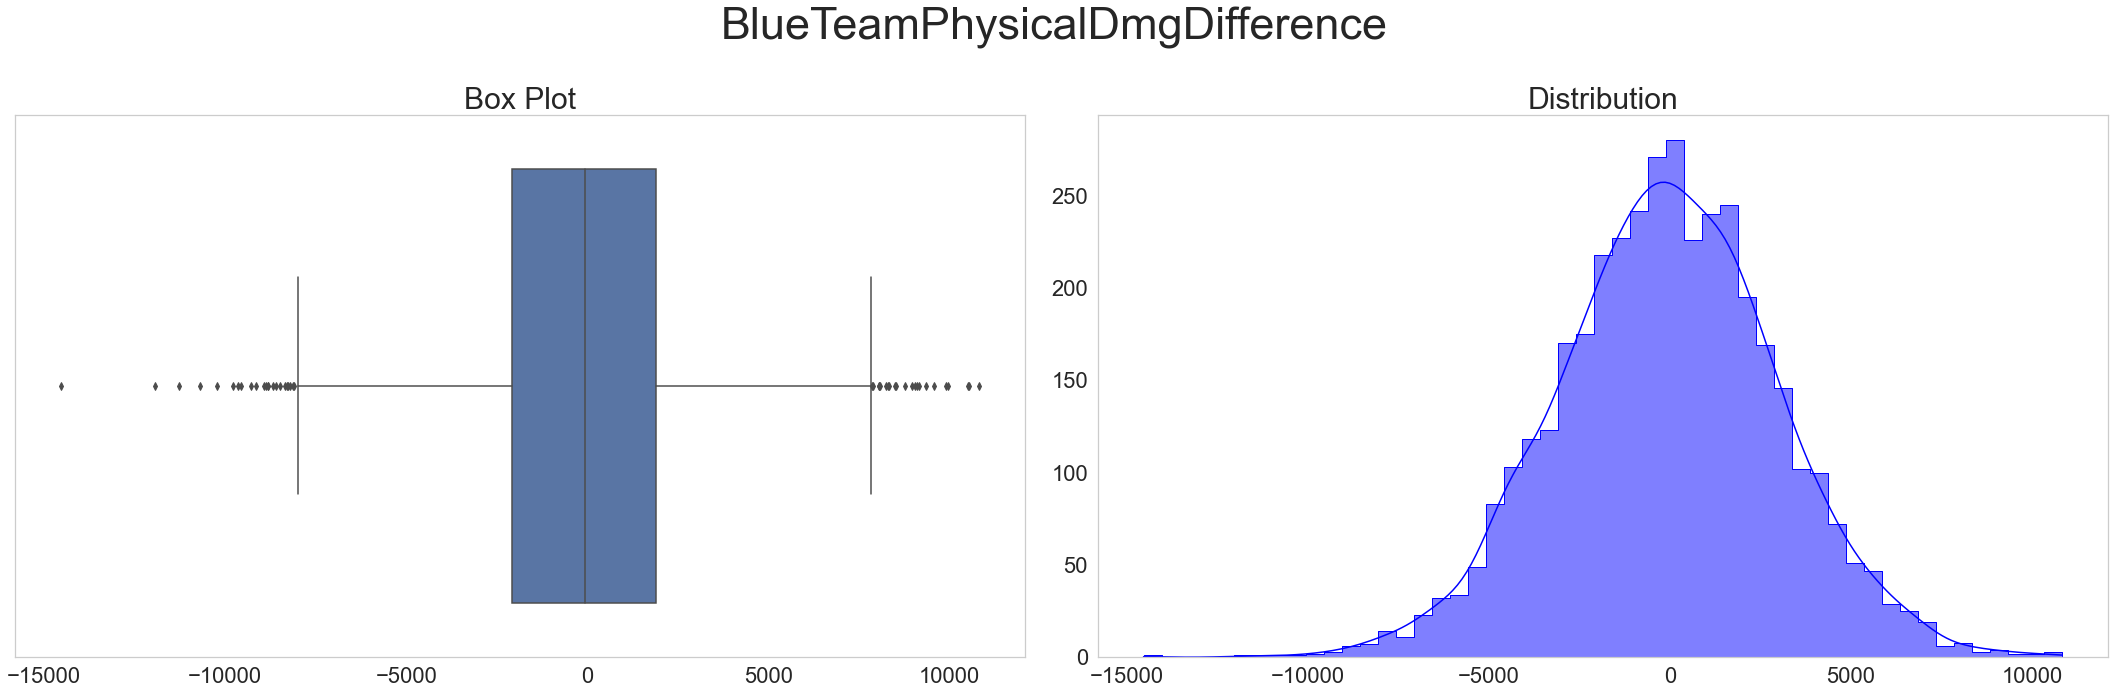

Summary Statistics for BlueTeamPhysicalDmgDifference
count     3890.000000
mean       -85.191774
std       3052.809133
min     -14542.000000
25%      -2068.500000
50%        -51.000000
75%       1903.750000
max      10834.000000
Name: BlueTeamPhysicalDmgDifference, dtype: float64


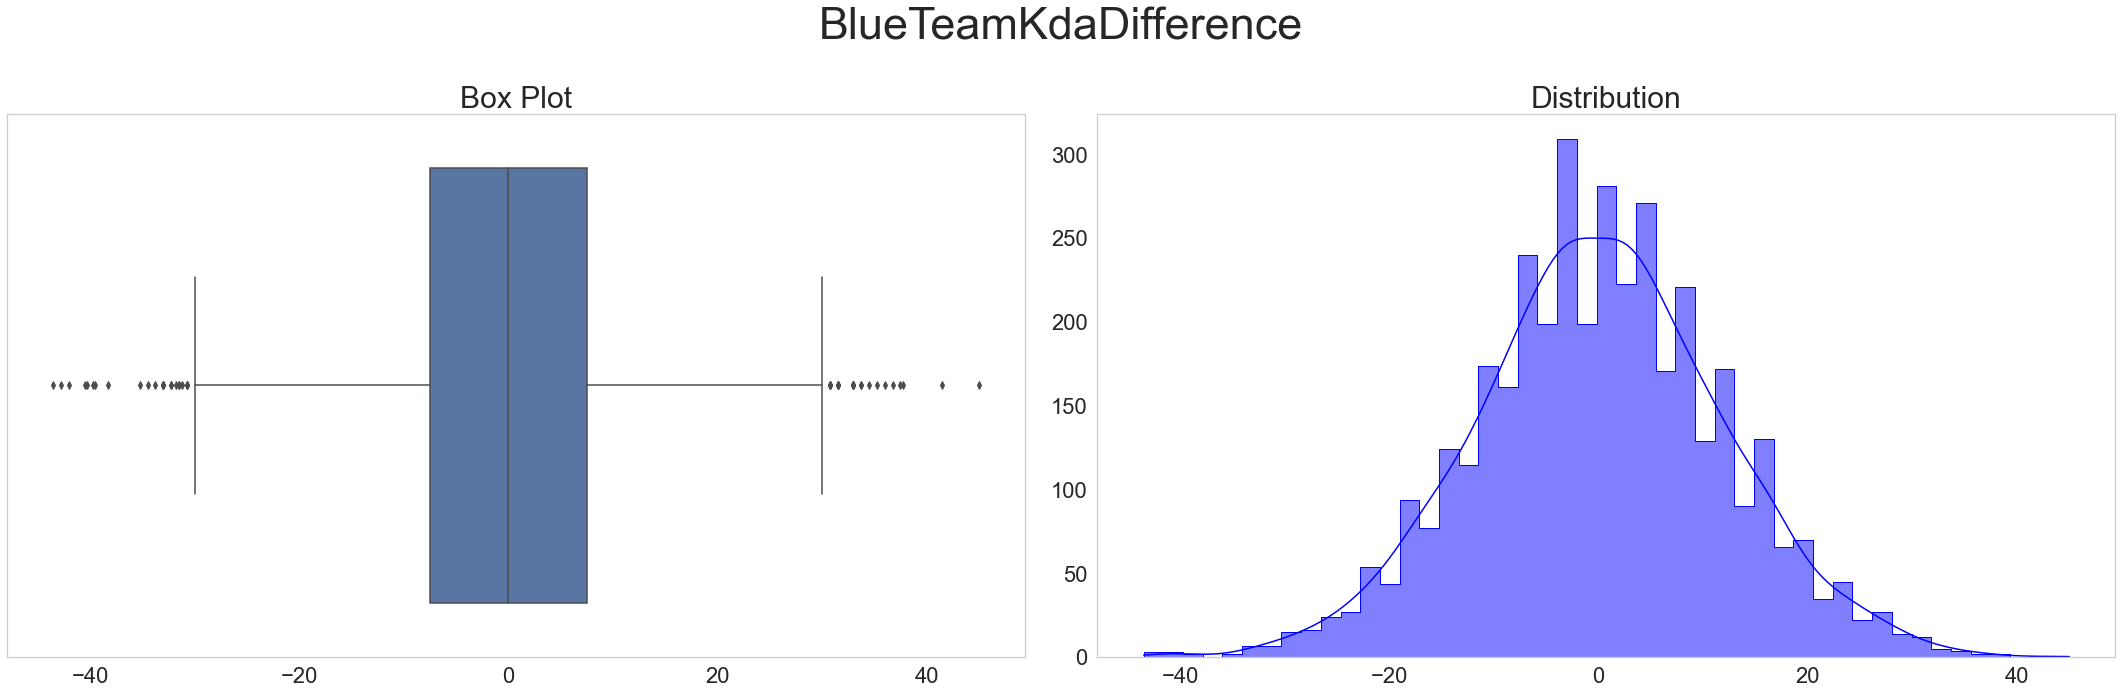

Summary Statistics for BlueTeamKdaDifference
count    3890.000000
mean        0.099679
std        11.900647
min       -43.500000
25%        -7.500000
50%         0.000000
75%         7.500000
max        45.000000
Name: BlueTeamKdaDifference, dtype: float64


In [25]:
# univariate study
univariate_study = ['BlueTeamPhysicalDmgDifference','BlueTeamKdaDifference']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

### Takeaways
- Blue teams physical damage difference was 85 and the kda was above 0

### Man Whitney U

In [26]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(train.BlueTeamPhysicalDmgDifference, train.BlueTeamKdaDifference)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")


6352.7515071723765 0.0
blue and red populations do not have equal variances


## Hypothesis 

### $H_0$: Blue team's physical damage difference over 0 and blue team's kda difference over 0  is not significant

### $H_a$: Blue team's physical damage difference over 0 and blue team's kda difference over 0  is significant

In [44]:
# hypothesis testing
import scipy.stats as stats
null_hypothesis = "Blue team's physical damage difference over 0 and blue team's kda difference over 0  is not significant"
alternative_hypothesis = "Blue team's physical damage difference over 0 and blue team's kda difference over 0 is significant"
a = 0.05 #a for alpha 

big_xp = train[train.BlueTeamPhysicalDmgDifference > 0]
little_xp = train[train.BlueTeamKdaDifference >= 0]
t, p = stats.ttest_ind(big_xp.winningTeam, little_xp.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.013219864349747099
Reject null hypothesis that: Blue team's physical damage difference over 0 and blue team's kda difference over 0  is not significant
There is evidence to suggest: Blue team's physical damage difference over 0 and blue team's kda difference over 0 is significant


<Figure size 720x360 with 0 Axes>

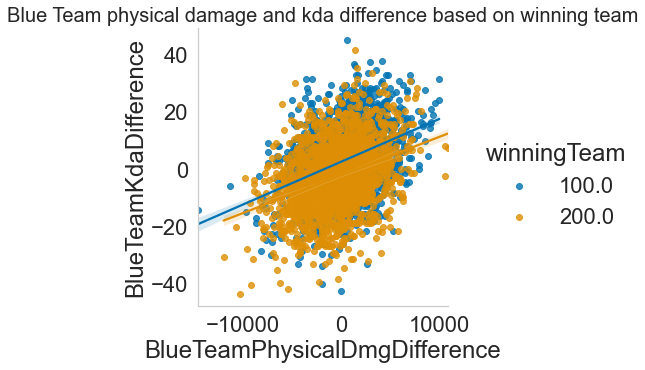

In [28]:
plt.figure(figsize=(10,5))
sns.lmplot(x='BlueTeamPhysicalDmgDifference',y='BlueTeamKdaDifference',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Team physical damage and kda difference based on winning team', fontsize = 20)
plt.show()

### Question 3
- Is there a correlation between Blue team ward difference and blue team's minion kill difference that will effect the outcome of the game

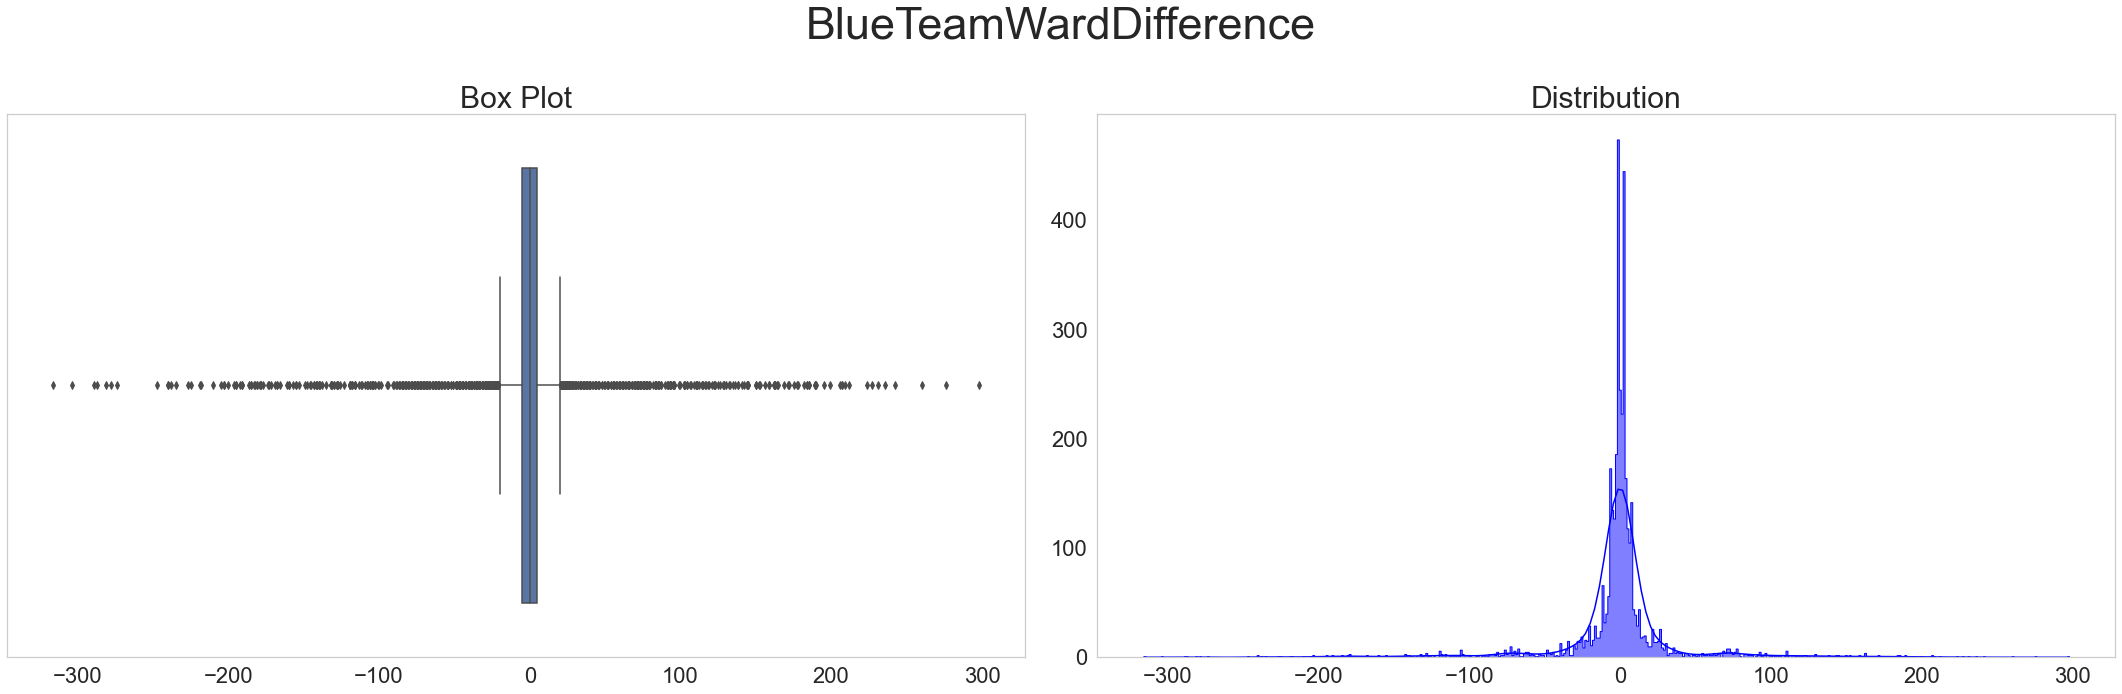

Summary Statistics for BlueTeamWardDifference
count    3890.000000
mean       -1.109769
std        42.687964
min      -316.000000
25%        -5.000000
50%         0.000000
75%         5.000000
max       298.000000
Name: BlueTeamWardDifference, dtype: float64


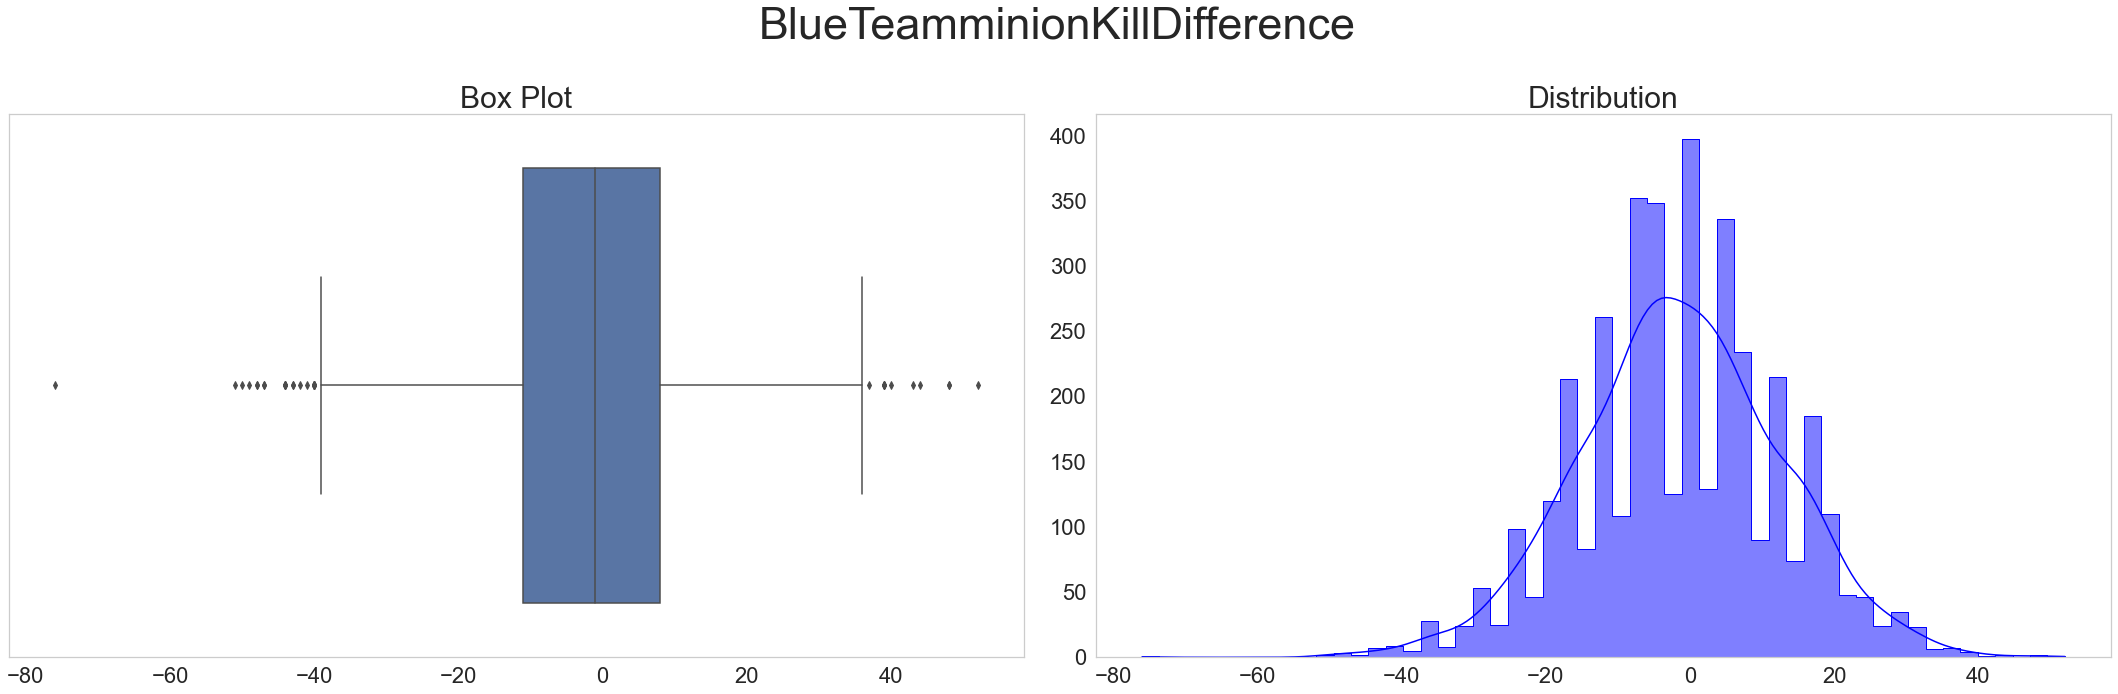

Summary Statistics for BlueTeamminionKillDifference
count    3890.000000
mean       -1.453470
std        14.120155
min       -76.000000
25%       -11.000000
50%        -1.000000
75%         8.000000
max        52.000000
Name: BlueTeamminionKillDifference, dtype: float64


In [29]:
# univariate study
univariate_study = ['BlueTeamWardDifference',
       'BlueTeamminionKillDifference']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

- blue team wards and minion kill difference are normally distributed
- blue team ward and minion kill difference are averaging the same

# Man Whitney U

In [43]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(train.BlueTeamWardDifference, train.BlueTeamminionKillDifference)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")


148.81606594841944 6.413594118110024e-34
blue and red populations do not have equal variances


## Hypothesis 

## $H_0$: Blue team's  minion kills difference over 0  is not significant

## $H_a$: Blue team's  minion kills difference over 0  is  significant

In [41]:
# hypothesis testing
import scipy.stats as stats
null_hypothesis = "Blue team's  minion kills difference over 0  is not significant"
alternative_hypothesis = "Blue team's  minion kills difference over 0  is  significant"
a = 0.05 #a for alpha 

big_xp = train[train.BlueTeamminionKillDifference > 0]
little_xp = train[train.BlueTeamminionKillDifference <= 0]
t, p = stats.ttest_ind(big_xp.winningTeam, little_xp.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

6.278204920750309e-07
Reject null hypothesis that: Blue team's  minion kills difference over 0  is not significant
There is evidence to suggest: Blue team's  minion kills difference over 0  is  significant


### Hypothesis Results:
- killing minions was significant in the early game with a p value less than alpha

<Figure size 720x360 with 0 Axes>

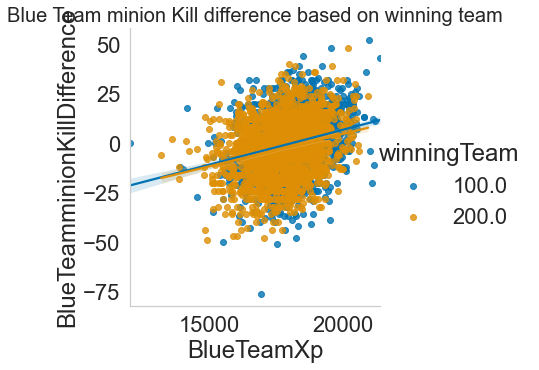

In [40]:
plt.figure(figsize=(10,5))
sns.lmplot(x='BlueTeamXp',y='BlueTeamminionKillDifference',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Team minion Kill difference based on winning team', fontsize = 20)
plt.show()

### Takeaways
- Blue team's gold difference over 40 and blue team's level difference over 1 was not significant with a p value of .95

- Blue team's ward difference over 0 and blue team's minion kills difference over 0 was not significant with a p value of .06

- Blue team's physical damage difference over -85 and blue team's kda difference over 0 is significant with a p value of .01

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
#validation & tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
cv=KFold(n_splits = 5, random_state=123,shuffle=True)

In [ ]:
info_x=df.drop(['gameMode', 'gameType','gameVersion','matchId','gameName'],axis=1)
info_y=df.winningTeam

In [ ]:
knn_params = {"n_neighbors" :np.arange(95,105),
             "weights" : ["distance"],
             "algorithm" : ["ball_tree"] , #,"kd_tree","brute"
             "leaf_size":[1,2]}

In [ ]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params,cv=cv,verbose=2,n_jobs=-1)
grid_knn.fit(info_x,info_y)

In [ ]:
knn_best_params=grid_knn.best_params_
knn_best_params

In [ ]:
knn = KNeighborsClassifier(algorithm="ball_tree",n_neighbors=98,weights="distance",leaf_size=1)

In [ ]:
np.mean(cross_val_score(knn,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

In [ ]:
cat_params = {"learning_rate":[0.005],
              "depth":[6,8]}

In [ ]:
cat = CatBoostClassifier()

In [ ]:
cat_grid = GridSearchCV(cat,cat_params,cv=cv)

In [ ]:
cat_grid.fit(info_x,info_y)

In [ ]:
cat_grid.best_params_

In [ ]:
cat = CatBoostClassifier(learning_rate=0.005,depth=8,verbose=False)

In [ ]:
log_params = {"penalty":["l1","l2","elasticnet"],
              "solver":['newton-cg', 'lbfgs', 'sag', 'saga'],
             "C":[1,5,10,20,30,50,100],
             "warm_start":[True,False]}

In [ ]:
logreg=LogisticRegression()

In [ ]:
log_grid = GridSearchCV(logreg,log_params,cv=cv,verbose=2,n_jobs=-1)

In [ ]:
log_grid.fit(info_x,info_y)

In [ ]:
svc_params={'kernel':['poly','sigmoid'],
           'C':[1,10,20,50,100]}

In [ ]:
svc=SVC()

In [ ]:
svc_grid=GridSearchCV(svc,svc_params,cv=cv,verbose=2,n_jobs=-1)

In [ ]:
svc_grid.fit(info_x,info_y)

In [ ]:
svc_grid.best_params_

In [ ]:
svc=SVC(kernel="poly",probability=True,C=20)

In [ ]:
np.mean(cross_val_score(svc,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

In [ ]:
ada_params={"learning_rate":[0.05,0.1,0.2,0.5,1],
           "algorithm":['SAMME', 'SAMME.R'],
           "n_estimators":[50,100,150,500]}

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
ada_grid = GridSearchCV(ada,ada_params,cv=cv,verbose=2)

In [ ]:
ada_grid.fit(info_x,info_y)

In [ ]:
ada_grid.best_params_

In [ ]:
ada_best_params = {"learning_rate":0.05,
                  "algorithm":"SAMME.R",
                  "n_estimators":150}


In [ ]:
ada=AdaBoostClassifier(**ada_best_params)

In [ ]:
np.mean(cross_val_score(ada,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

In [ ]:
rdf_params={"criterion":["entropy"],#gini
           "max_depth":[8], #2,4,6
           "min_samples_split":[4],#2,6
           "max_features":["sqrt"]} #log2

In [ ]:
rdf=RandomForestClassifier()

In [ ]:
rdf_grid=GridSearchCV(rdf,rdf_params,cv=cv,verbose=2,n_jobs=-1)

In [ ]:
rdf_grid.fit(info_x,info_y)

In [ ]:
rdf_grid.best_params_

In [ ]:
rdf=RandomForestClassifier(criterion="entropy",max_depth=8,max_features="sqrt",min_samples_split=4)

In [ ]:
np.mean(cross_val_score(rdf,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

In [ ]:
xgb_params = {"eta":[0.01,0.05,0.1],
              "max_depth":[2,4,6,8],
              "objective":["binary:logistic"],
             "lambda":[1.20,50],
             "alpha":[0,20],
             "subsample":[0.3,0.7,0.8,1]}

In [ ]:
xgb=XGBClassifier()

In [ ]:
xgb_grid=GridSearchCV(xgb,xgb_params,cv=None,verbose=2,n_jobs=-1)

In [ ]:
xgb_grid.fit(info_x,info_y)

In [ ]:
xgb_grid.best_params_

In [ ]:
xgb=XGBClassifier(eta=0.05,max_depth=2,objective="binary:logistic",reg_lambda=50)

In [ ]:
eclf = EnsembleVoteClassifier(clfs=[cat,logreg, knn, svc,ada,rdf,xgb], weights=[1,1,1,1,1,1,1])
labels = ['CatBoost','Logistic Regression', 'KNN', 'SVC','AdaBoost',"Random Forest",'XGBoost','Ensemble']
for clf, label in zip([cat,logreg, knn, svc, ada, rdf, xgb,eclf], labels):

    scores = cross_val_score(clf, info_x, info_y, 
                             cv=cv, 
                             scoring='accuracy',
                             n_jobs=-1)

    print("[%s] Accuracy: %0.6f (+/- %0.6f) Best: %0.6f " 
          % (label,scores.mean(), scores.std(), scores.max()))